### Reference

[Awesome data visualization tools in Python](https://www.youtube.com/watch?v=OC-YdBz8Llw&index=1&list=LLuf7FRBNetPfjsIZ-t58nVw)

https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

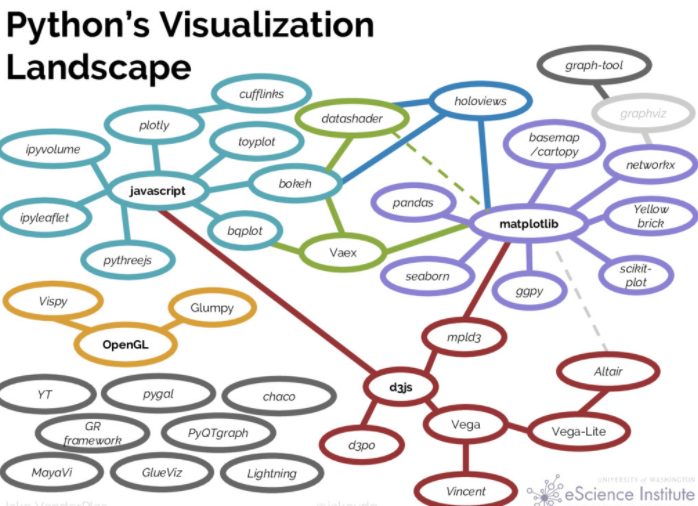

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx

In [12]:
def hierarchy_pos(G, root, levels=None, width=1., height=1.):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
    
    Args:
       G: the graph
       root: the root node
       levels: a dictionary
               key: level number (starting from 0)
               value: number of nodes in this level
       width: horizontal space allocated for drawing
       height: vertical space allocated for drawing
    '''
    
    TOTAL = "total"
    CURRENT = "current"

    def make_levels(levels, node=root, currentLevel=0, parent=None):
        """Compute the number of nodes for each level
        """
        if not currentLevel in levels:
            levels[currentLevel] = {TOTAL : 0, CURRENT : 0}
            
        levels[currentLevel][TOTAL] += 1
        neighbors = G.neighbors(node)
        
        if parent is not None:
            neighbors.remove(parent)
            
        for neighbor in neighbors:
            levels =  make_levels(levels, neighbor, currentLevel + 1, node)
            
        return levels

    def make_pos(pos, node=root, currentLevel=0, parent=None, vert_loc=0):
        dx = 1/levels[currentLevel][TOTAL]
        left = dx/2
        pos[node] = ((left + dx*levels[currentLevel][CURRENT])*width, vert_loc)
        levels[currentLevel][CURRENT] += 1
        neighbors = G.neighbors(node)
        
        if parent is not None:
            neighbors.remove(parent)
            
        for neighbor in neighbors:
            pos = make_pos(pos, neighbor, currentLevel + 1, node, vert_loc-vert_gap)
            
        return pos
    
    if levels is None:
        levels = make_levels({})
    else:
        levels = {l:{TOTAL: levels[l], CURRENT:0} for l in levels}
        
    vert_gap = height / (max([l for l in levels])+1)
    
    return make_pos({})

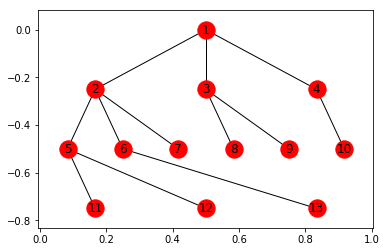

In [13]:
edges = [(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10), (5,11), (5,12), (6,13)]

G = nx.Graph()
G.add_edges_from(edges)

pos = hierarchy_pos(G, 1)  # root is 1  
nx.draw_networkx(G, pos=pos, with_labels=True)


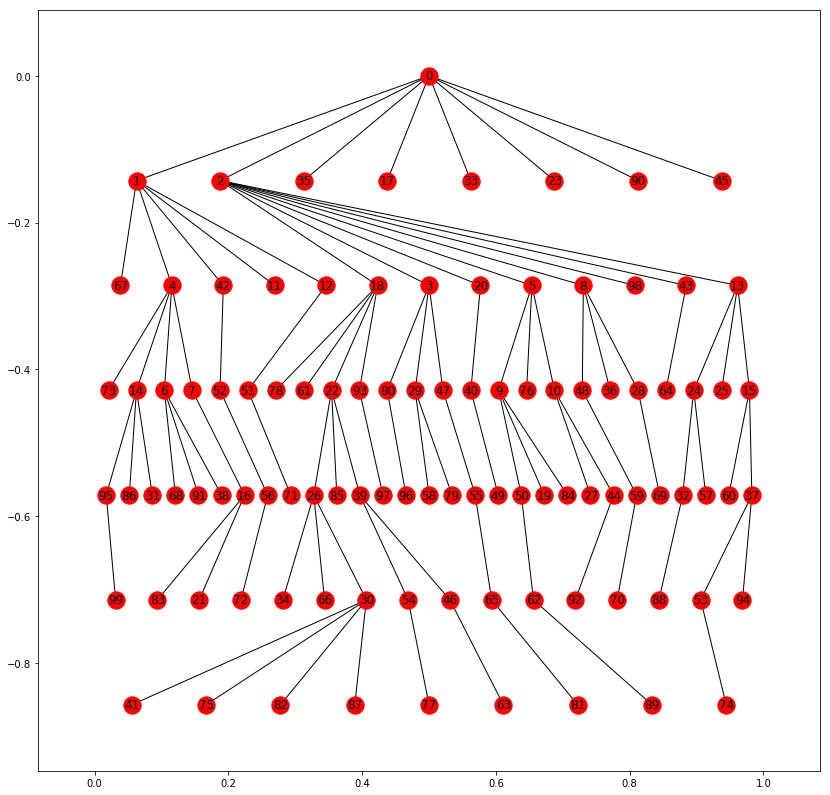

In [18]:
edges = [(0, 1),(0, 2),(0, 17),(0, 23),(0, 33),(0, 35),(0, 45),(0, 90),(1, 4),(1, 11),(1, 12),(1, 42),(1, 67),(2, 3),(2, 5),(2, 8),(2, 13),(2, 18),(2, 20),(2, 43),(2, 98),(3, 29),(3, 47),(3, 80),(4, 6),(4, 7),(4, 14),(4, 73),(5, 9),(5, 10),(5, 76),(6, 38),(6, 68),(6, 91),(7, 16),(8, 28),(8, 36),(8, 48),(9, 19),(9, 50),(9, 84),(10, 27),(10, 44),(12, 51),(13, 15),(13, 24),(13, 25),(14, 31),(14, 86),(14, 95),(15, 37),(15, 60),(16, 21),(16, 83),(18, 22),(18, 61),(18, 78),(18, 93),(20, 40),(22, 26),(22, 39),(22, 85),(24, 32),(24, 57),(26, 30),(26, 34),(26, 66),(28, 69),(29, 58),(29, 79),(30, 41),(30, 75),(30, 82),(30, 87),(32, 88),(37, 53),(37, 94),(39, 46),(39, 54),(40, 49),(42, 52),(43, 64),(44, 92),(46, 63),(47, 55),(48, 59),(50, 62),(51, 71),(52, 56),(53, 74),(54, 77),(55, 65),(56, 72),(59, 70),(62, 89),(65, 81),(80, 96),(93, 97),(95, 99)]

G = nx.Graph()
G.add_edges_from(edges)

pos = hierarchy_pos(G, 0)    

plt.figure(1, figsize=(14,14)) 
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.show()